In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV

In [3]:
house_data = pd.read_csv("/content/BostonHousing.csv")

In [4]:
house_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
house_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
house_data.shape

(506, 14)

In [8]:
house_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [9]:
house_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
correlation = house_data.corr()

<Axes: >

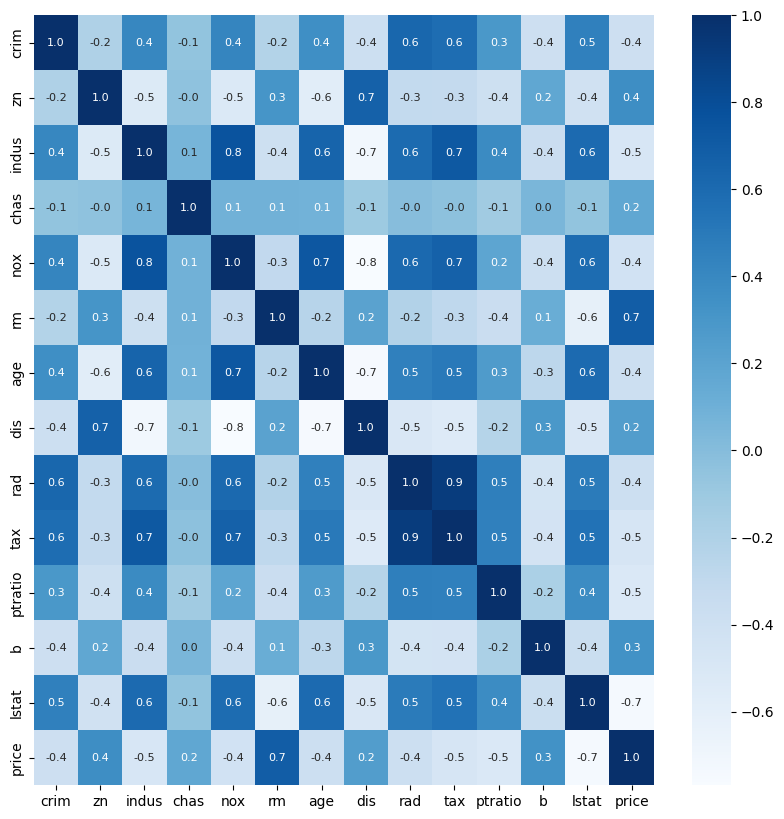

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, fmt='.1f', annot = True, annot_kws ={'size':8}, cmap = 'Blues')

In [14]:
X = house_data.drop(columns='price', axis = 1)
Y = house_data['price']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=3)

In [33]:
regressor = XGBRegressor()

In [46]:
regressor.fit(X_train,Y_train, eval_set=[(X_train,Y_train), (X_test,Y_test)], early_stopping_rounds=10)

[0]	validation_0-rmse:17.06829	validation_1-rmse:17.52295
[1]	validation_0-rmse:12.30335	validation_1-rmse:12.84110
[2]	validation_0-rmse:8.94162	validation_1-rmse:9.54634
[3]	validation_0-rmse:6.57979	validation_1-rmse:7.22233
[4]	validation_0-rmse:4.91723	validation_1-rmse:5.44104
[5]	validation_0-rmse:3.76252	validation_1-rmse:4.31897
[6]	validation_0-rmse:2.89760	validation_1-rmse:3.56269
[7]	validation_0-rmse:2.30638	validation_1-rmse:3.13347
[8]	validation_0-rmse:1.90969	validation_1-rmse:2.85722
[9]	validation_0-rmse:1.65391	validation_1-rmse:2.73199
[10]	validation_0-rmse:1.44153	validation_1-rmse:2.64722
[11]	validation_0-rmse:1.32221	validation_1-rmse:2.57327


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.20372	validation_1-rmse:2.51709
[13]	validation_0-rmse:1.13512	validation_1-rmse:2.47699
[14]	validation_0-rmse:1.06352	validation_1-rmse:2.46827
[15]	validation_0-rmse:0.98897	validation_1-rmse:2.45255
[16]	validation_0-rmse:0.93046	validation_1-rmse:2.44758
[17]	validation_0-rmse:0.91021	validation_1-rmse:2.44258
[18]	validation_0-rmse:0.84762	validation_1-rmse:2.44226
[19]	validation_0-rmse:0.79746	validation_1-rmse:2.45789
[20]	validation_0-rmse:0.72212	validation_1-rmse:2.47531
[21]	validation_0-rmse:0.67265	validation_1-rmse:2.46899
[22]	validation_0-rmse:0.61907	validation_1-rmse:2.46978
[23]	validation_0-rmse:0.59103	validation_1-rmse:2.47490
[24]	validation_0-rmse:0.56267	validation_1-rmse:2.47656
[25]	validation_0-rmse:0.53575	validation_1-rmse:2.47864
[26]	validation_0-rmse:0.50099	validation_1-rmse:2.47396
[27]	validation_0-rmse:0.47676	validation_1-rmse:2.47446


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
predict_train = regressor.predict(X_train)
score_train1 = metrics.r2_score(Y_train, predict_train)
score_train2 = metrics.mean_absolute_error(Y_train, predict_train)
print('r2_score: ',score_train1)
print('mse: ',score_train2)

r2_score:  0.9915279817518414
mse:  0.6209632635116576


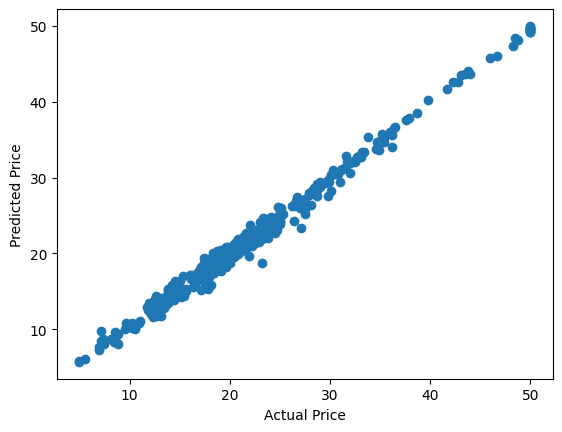

In [48]:
plt.scatter(Y_train, predict_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [49]:
predict_test = regressor.predict(X_test)
score_test1 = metrics.r2_score(Y_test, predict_test)
score_test2 = metrics.mean_absolute_error(Y_test, predict_test)
print('r2_score: ',score_test1)
print('mse: ',score_test2)

r2_score:  0.927923881698791
mse:  1.8105394821540977


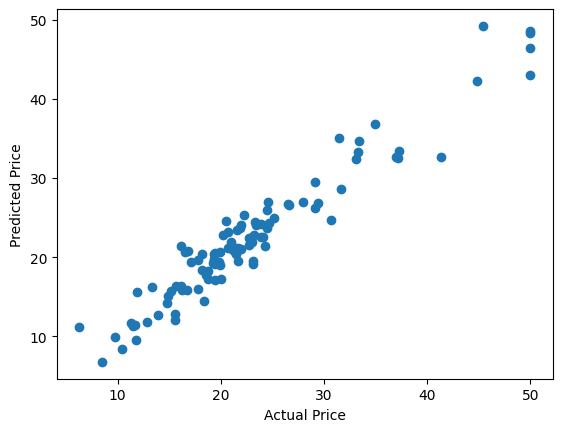

In [50]:
plt.scatter(Y_test, predict_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()